# Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Подготовьте данные

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels

In [4]:
data = pd.read_csv('/datasets/games.csv')

In [5]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


##### 1.Замените названия столбцов (приведите к нижнему регистру);

In [6]:
data.columns = data.columns.str.lower()

In [7]:
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


##### <br>2.Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;

In [9]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [10]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [11]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [12]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [13]:
data[data['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [14]:
data['user_score'] = data['user_score'].replace('tbd', np.NaN).astype('float')

In [15]:
data['critic_score'] = data['critic_score'].fillna(-1)
data['user_score'] = data['user_score'].fillna(-1)
data['rating'] = data['rating'].fillna('no_rating')

In [16]:
data['year_of_release'] = data['year_of_release'].astype('Int64')

###### Вывод:

<br>critic_score - Заполнить медианной и средним будет не получится. Произвели замену на пропущенных значений на -1.
<br>users_score - Заполнить медианной и средним будет не получится. Произвели замену на пропущенных значений на -1. Тип заменен на float.
<br>rating - Заполнить медианной и средним будет не получится. Произвели замену на пропущенных значений на 'no_rating'
<br>year_of_release - Тип заменен на float.
<br>year_of_release, genre и name - Не существенно много пропусков, оставила как есть.

In [17]:
data['user_score'].unique()

array([ 8. , -1. ,  8.3,  8.5,  6.6,  8.4,  8.6,  7.7,  6.3,  7.4,  8.2,
        9. ,  7.9,  8.1,  8.7,  7.1,  3.4,  5.3,  4.8,  3.2,  8.9,  6.4,
        7.8,  7.5,  2.6,  7.2,  9.2,  7. ,  7.3,  4.3,  7.6,  5.7,  5. ,
        9.1,  6.5,  8.8,  6.9,  9.4,  6.8,  6.1,  6.7,  5.4,  4. ,  4.9,
        4.5,  9.3,  6.2,  4.2,  6. ,  3.7,  4.1,  5.8,  5.6,  5.5,  4.4,
        4.6,  5.9,  3.9,  3.1,  2.9,  5.2,  3.3,  4.7,  5.1,  3.5,  2.5,
        1.9,  3. ,  2.7,  2.2,  2. ,  9.5,  2.1,  3.6,  2.8,  1.8,  3.8,
        0. ,  1.6,  9.6,  2.4,  1.7,  1.1,  0.3,  1.5,  0.7,  1.2,  2.3,
        0.5,  1.3,  0.2,  0.6,  1.4,  0.9,  1. ,  9.7])

In [18]:
data['critic_score'].unique()

array([76., -1., 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [19]:
data['rating'].unique()

array(['E', 'no_rating', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

##### Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [20]:
data['world_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

## Проведите исследовательский анализ данных

##### 1. Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

<AxesSubplot:title={'center':'Динамика по количеству игр в год'}, xlabel='Год релиза', ylabel='Количество игр в год'>

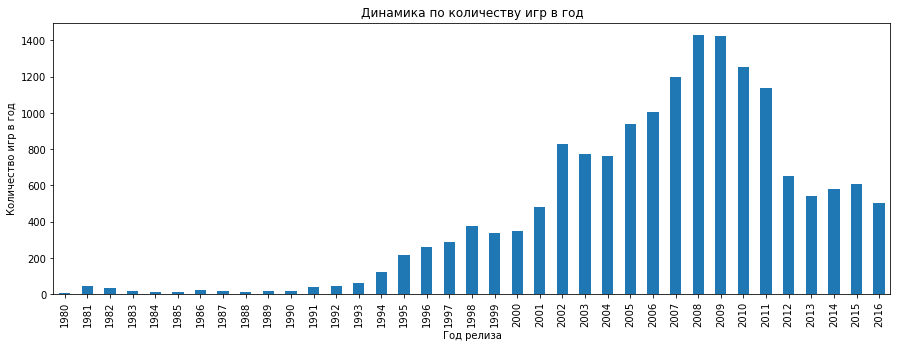

In [21]:
data.groupby('year_of_release')['year_of_release'].count().plot(kind='bar', y='year_of_release', figsize=(15,5), title='Динамика по количеству игр в год', xlabel='Год релиза', ylabel='Количество игр в год')

C 1995 года игры набирают популярность. Пик приходится на 2008 - 2009 год. Мне кажется, что можно брать данные не за весь период, а начиная с 1995 года.

##### 2.Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [22]:
sales = data.pivot_table(index='platform', values='world_sales', aggfunc='sum').sort_values(by='world_sales', ascending=False)

<AxesSubplot:title={'center':'Распределение по суммарным продажам'}, xlabel='Платформа', ylabel='Суммарные продажи'>

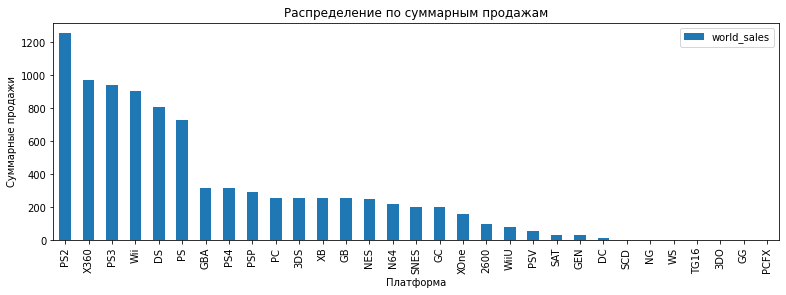

In [23]:
sales.plot(kind='bar', figsize=(13,4), title='Распределение по суммарным продажам', xlabel='Платформа', ylabel='Суммарные продажи')

<b>Выделим 3 платформы с наибольшими суммарными продажами

<AxesSubplot:title={'center':'Распределение по суммарным продажам в год (PS2)'}, xlabel='Год релиза', ylabel='Суммарные продажи'>

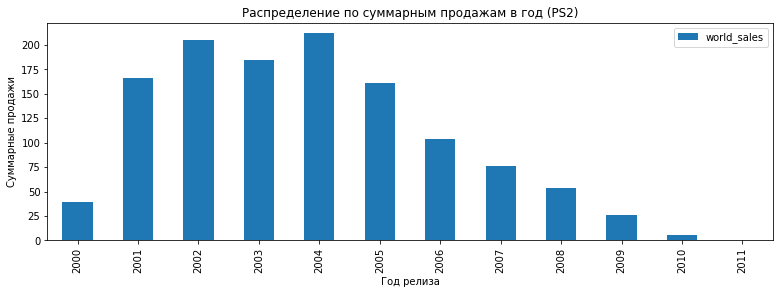

In [24]:
data[data['platform'] == 'PS2'].pivot_table(index='year_of_release', values='world_sales', aggfunc='sum').plot(kind='bar', figsize=(13,4),  title='Распределение по суммарным продажам в год (PS2)', xlabel='Год релиза', ylabel='Суммарные продажи')

<AxesSubplot:title={'center':'Распределение по суммарным продажам в год (Х360)'}, xlabel='Год релиза', ylabel='Суммарные продажи'>

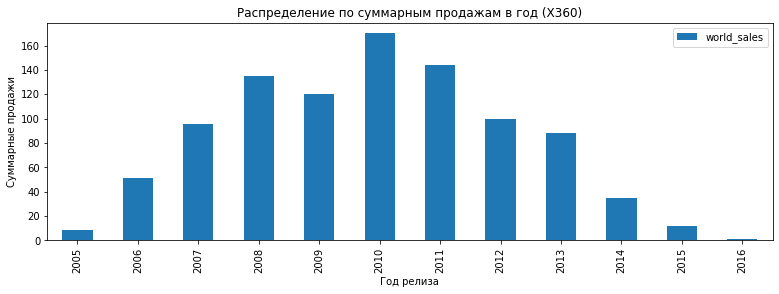

In [25]:
data[data['platform'] == 'X360'].pivot_table(index='year_of_release', values='world_sales', aggfunc='sum').plot(kind='bar', figsize=(13,4), title='Распределение по суммарным продажам в год (Х360)', xlabel='Год релиза', ylabel='Суммарные продажи')

<AxesSubplot:title={'center':'Распределение по суммарным продажам в год (PS3)'}, xlabel='Год релиза', ylabel='Суммарные продажи'>

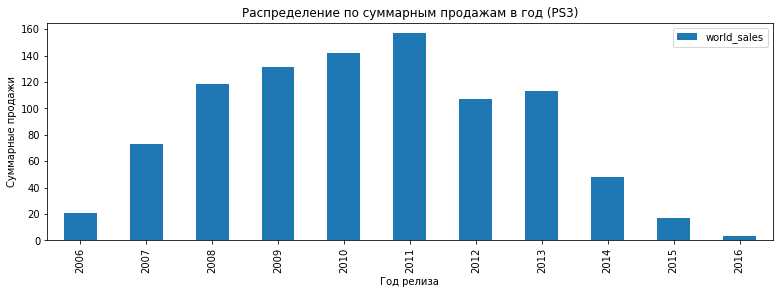

In [26]:
data[data['platform'] == 'PS3'].pivot_table(index='year_of_release', values='world_sales', aggfunc='sum').plot(kind='bar', figsize=(13,4), title='Распределение по суммарным продажам в год (PS3)', xlabel='Год релиза', ylabel='Суммарные продажи')

<AxesSubplot:title={'center':'Распределение по суммарным продажам в год (Wii)'}, xlabel='Год релиза', ylabel='Суммарные продажи'>

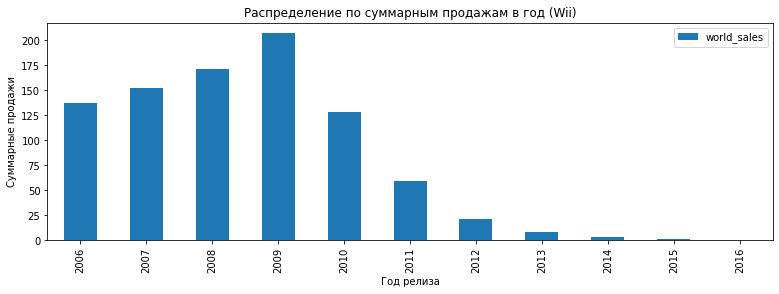

In [27]:
data[data['platform'] == 'Wii'].pivot_table(index='year_of_release', values='world_sales', aggfunc='sum').plot(kind='bar', figsize=(13,4), title='Распределение по суммарным продажам в год (Wii)', xlabel='Год релиза', ylabel='Суммарные продажи')

<AxesSubplot:title={'center':'Распределение по суммарным продажам в год (DS)'}, xlabel='Год релиза', ylabel='Суммарные продажи'>

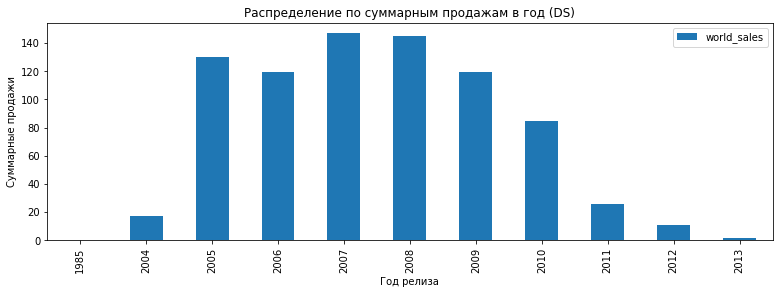

In [28]:
data[data['platform'] == 'DS'].pivot_table(index='year_of_release', values='world_sales', aggfunc='sum').plot(kind='bar', figsize=(13,4), title='Распределение по суммарным продажам в год (DS)', xlabel='Год релиза', ylabel='Суммарные продажи')

<AxesSubplot:title={'center':'Распределение по суммарным продажам в год (PS)'}, xlabel='Год релиза', ylabel='Суммарные продажи'>

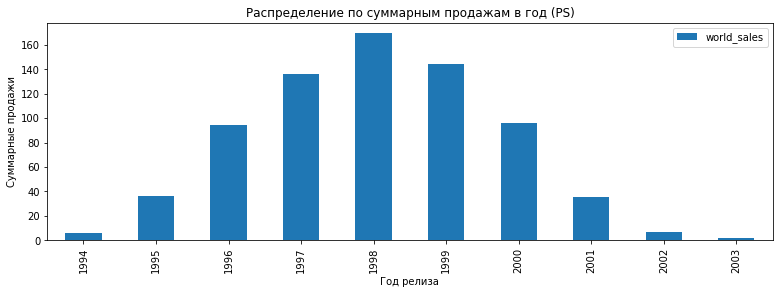

In [29]:
data[data['platform'] == 'PS'].pivot_table(index='year_of_release', values='world_sales', aggfunc='sum').plot(kind='bar', figsize=(13,4), title='Распределение по суммарным продажам в год (PS)', xlabel='Год релиза', ylabel='Суммарные продажи')

С выходом PS3 продажи в PS2 начали падать в 2011 году. Так же, еще заметила, что после выхода новой платформы обычно первые 5 лет идет рост продаж, но потом идут 5 лет спада, на фоне выхода более новой платформы.

##### 3.Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывайте в работе данные за предыдущие годы.

<AxesSubplot:xlabel='year_of_release'>

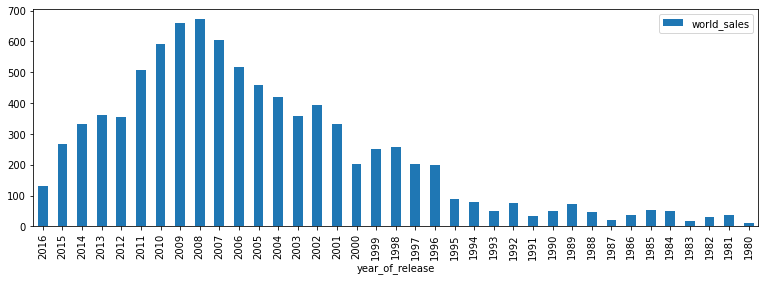

In [30]:
data.pivot_table(index='year_of_release', values='world_sales', aggfunc='sum').sort_values(by='year_of_release', ascending=False).plot(kind='bar', figsize=(13,4))

In [31]:
data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,world_sales
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,16715.000000,16715.000000,16715.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,33.060844,2.689447,0.533396
std,5.877050,0.813604,0.503339,0.308853,0.186731,36.299555,4.169833,1.548261
min,1980.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,-1.000000,-1.000000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,70.000000,7.300000,0.470000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,82.540000


Думаю, что нам нужен период после 2010 года. К этому времени уже упали продажи совсем стареньких платформ, появились новые, у которых еще не прошли 5 лет спада продаж.

In [32]:
data_actual = data[data['year_of_release'] > 2011]

In [33]:
data_actual

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,no_rating,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,no_rating,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,no_rating,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1.0,-1.0,no_rating,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,no_rating,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,no_rating,0.01


##### 4.Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.


In [34]:
data_actual.pivot_table(index='platform', values='world_sales', aggfunc='sum').sort_values(by='world_sales', ascending=False).head(10)

,world_sales
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18
Wii,35.37


<AxesSubplot:xlabel='platform'>

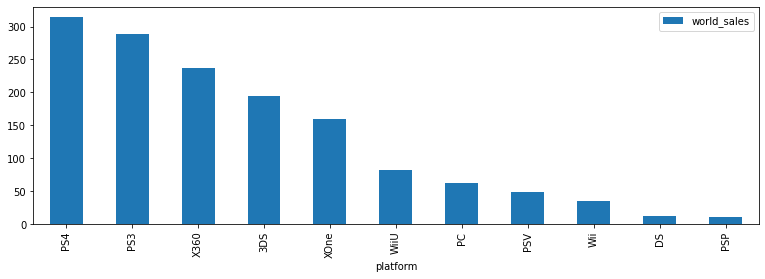

In [35]:
data_actual.pivot_table(index='platform', values='world_sales', aggfunc='sum').sort_values(by='world_sales', ascending=False).plot(kind='bar', figsize=(13,4))

<AxesSubplot:xlabel='year_of_release'>

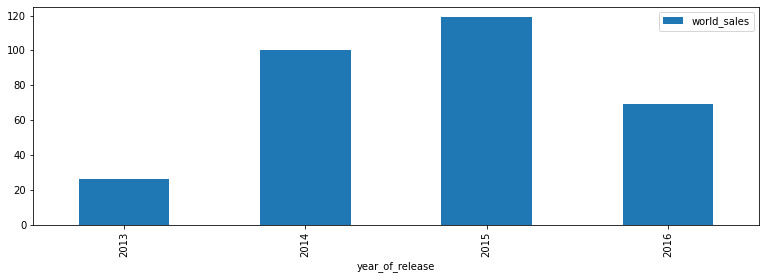

In [36]:
data_actual[data_actual['platform'] == 'PS4'].pivot_table(index='year_of_release', values='world_sales', aggfunc='sum').plot(kind='bar', figsize=(13,4))

<AxesSubplot:xlabel='year_of_release'>

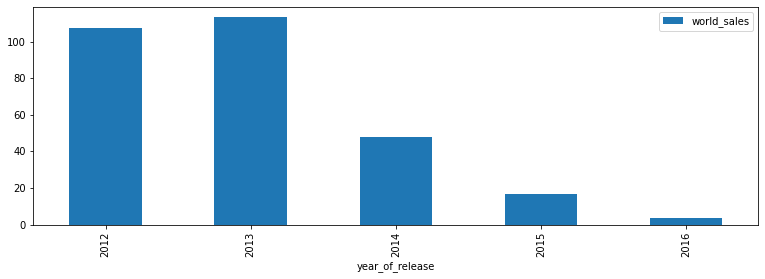

In [37]:
data_actual[data_actual['platform'] == 'PS3'].pivot_table(index='year_of_release', values='world_sales', aggfunc='sum').plot(kind='bar', figsize=(13,4))

<AxesSubplot:xlabel='year_of_release'>

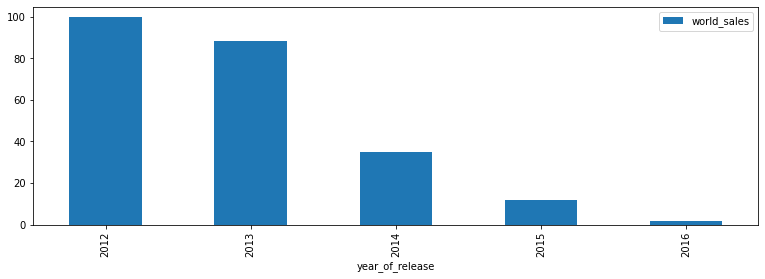

In [38]:
data_actual[data_actual['platform'] == 'X360'].pivot_table(index='year_of_release', values='world_sales', aggfunc='sum').plot(kind='bar', figsize=(13,4))

<AxesSubplot:xlabel='year_of_release'>

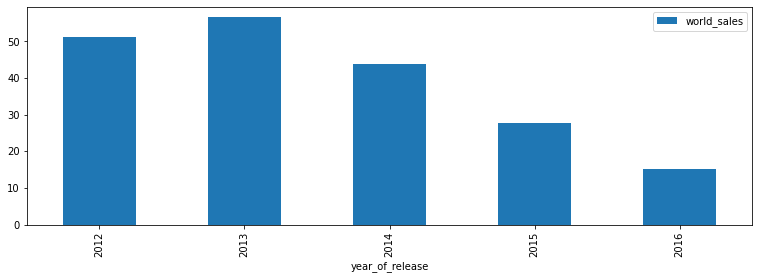

In [39]:
data_actual[data_actual['platform'] == '3DS'].pivot_table(index='year_of_release', values='world_sales', aggfunc='sum').plot(kind='bar', figsize=(13,4))

<AxesSubplot:xlabel='year_of_release'>

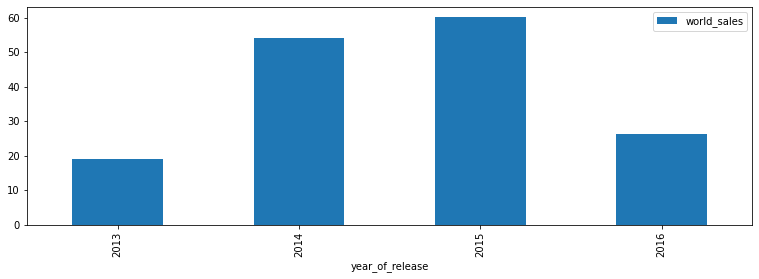

In [40]:
data_actual[data_actual['platform'] == 'XOne'].pivot_table(index='year_of_release', values='world_sales', aggfunc='sum').plot(kind='bar', figsize=(13,4))

Самой прибыльной я бы назвала из наших данных PS 4 и XOne, по сравнению с другими платформами у них еще не так сильно упали продажи.

##### 5.Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.


<AxesSubplot:xlabel='platform', ylabel='world_sales'>

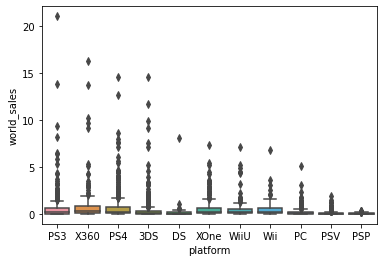

In [41]:
sns.boxplot(data=data_actual, x='platform', y='world_sales')

Ничего не видно, много выбросов

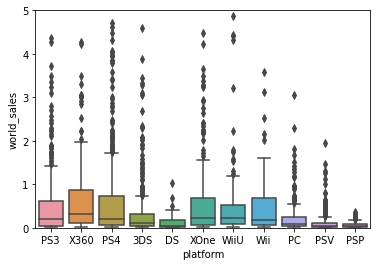

In [42]:
sns.boxplot(data=data_actual, x='platform', y='world_sales')
_ = plt.ylim(0, 5)

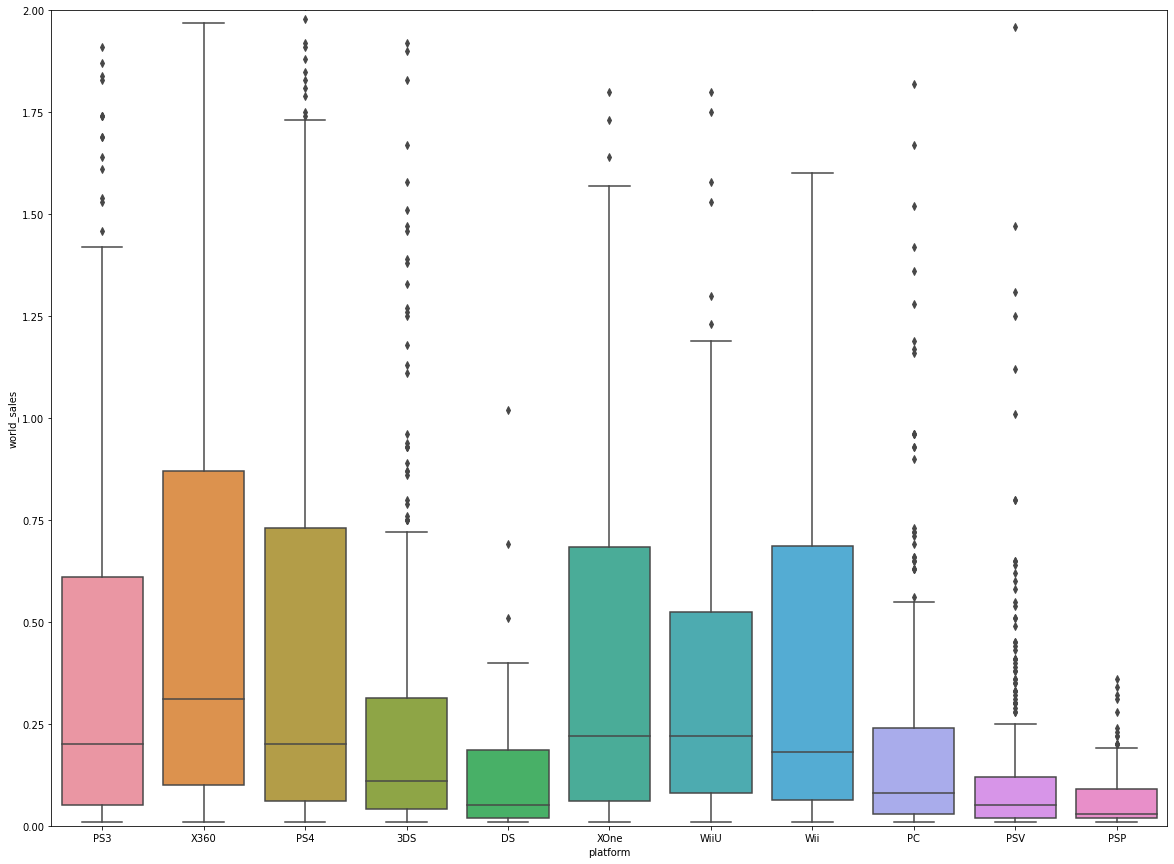

In [91]:
plt.figure(figsize=(20,15))
sns.boxplot(data=data_actual, x='platform', y='world_sales')
_ = plt.ylim(0, 2)

Медианна скачет у всех платформ. Выбросы - это фактически бестселлеры - самые популярные игры, поэтому добавила ограничения на графики.

In [97]:
data_actual[data_actual['platform'] == 'PS4']['world_sales'].describe()

count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: world_sales, dtype: float64

In [98]:
data_actual[data_actual['platform'] == 'PS3']['world_sales'].describe()

count    493.000000
mean       0.585781
std        1.462855
min        0.010000
25%        0.050000
50%        0.200000
75%        0.610000
max       21.050000
Name: world_sales, dtype: float64

In [99]:
data_actual[data_actual['platform'] == 'Wii']['world_sales'].describe()

count    54.000000
mean      0.655000
std       1.165447
min       0.010000
25%       0.062500
50%       0.180000
75%       0.687500
max       6.760000
Name: world_sales, dtype: float64

In [100]:
data_actual[data_actual['platform'] == 'XOne']['world_sales'].describe()

count    247.000000
mean       0.645020
std        1.036139
min        0.010000
25%        0.060000
50%        0.220000
75%        0.685000
max        7.390000
Name: world_sales, dtype: float64

In [101]:
data_actual[data_actual['platform'] == 'X360']['world_sales'].describe()

count    292.000000
mean       0.810068
std        1.712069
min        0.010000
25%        0.100000
50%        0.310000
75%        0.870000
max       16.270000
Name: world_sales, dtype: float64

Самые популярные платформы по продажам, то получается:
<br> PS4 медианное значение 200 тыс. Максимальное значение 14 млн. На квартиле 75% - 700 тыс.
<br> X360 медианное значение 300 тыс. Максимальное значение 16 млн. На квартиле 75% - 870 тыс.
<br> PS3 медианное значение 210 тыс. Максимальное значение 21 млн. На квартиле 75% - 610 тыс.
<br> XOne медианное значение 220 тыс. Максимальное значение 7 млн. На квартиле 75% - 685 тыс.
<br> Wii медианное значение 180 тыс. Максимальное значение 6 млн. На квартиле 75% - 687 тыс.

##### 6. Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

<AxesSubplot:xlabel='user_score', ylabel='world_sales'>

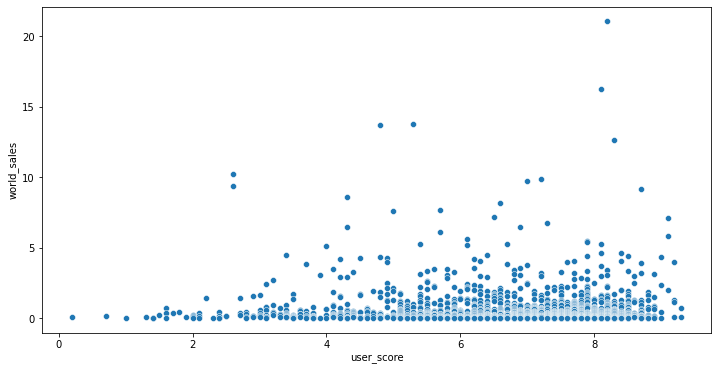

In [44]:
platform_name = data_actual[data_actual['platform'] == 'PS4']
platform_name = data_actual[data_actual['user_score'] != -1]
plt.figure(figsize=(12,6))
sns.scatterplot(x='user_score', y='world_sales', data=platform_name)

In [45]:
user_corr = platform_name['user_score'].corr(platform_name['world_sales'])
critic_corr = platform_name['critic_score'].corr(platform_name['world_sales'])
print('\n','Корреляция между оценкой пользователей и продажей по миру:', user_corr,'\n','Корреляция между оценкой критиков и продажей по миру:', critic_corr)


 Корреляция между оценкой пользователей и продажей по миру: 0.0044288176754932575 
 Корреляция между оценкой критиков и продажей по миру: 0.2007785293947467


Не такая сильная, но есть зависимость между оценкой критиков и продажами по миру.

##### 7.Соотнесите выводы с продажами игр на других платформах.

В этом задании все таки надо строить распределения по всем платформам или будет достаточно общего?
Я посмотрела общую картину для ответа.

<AxesSubplot:>

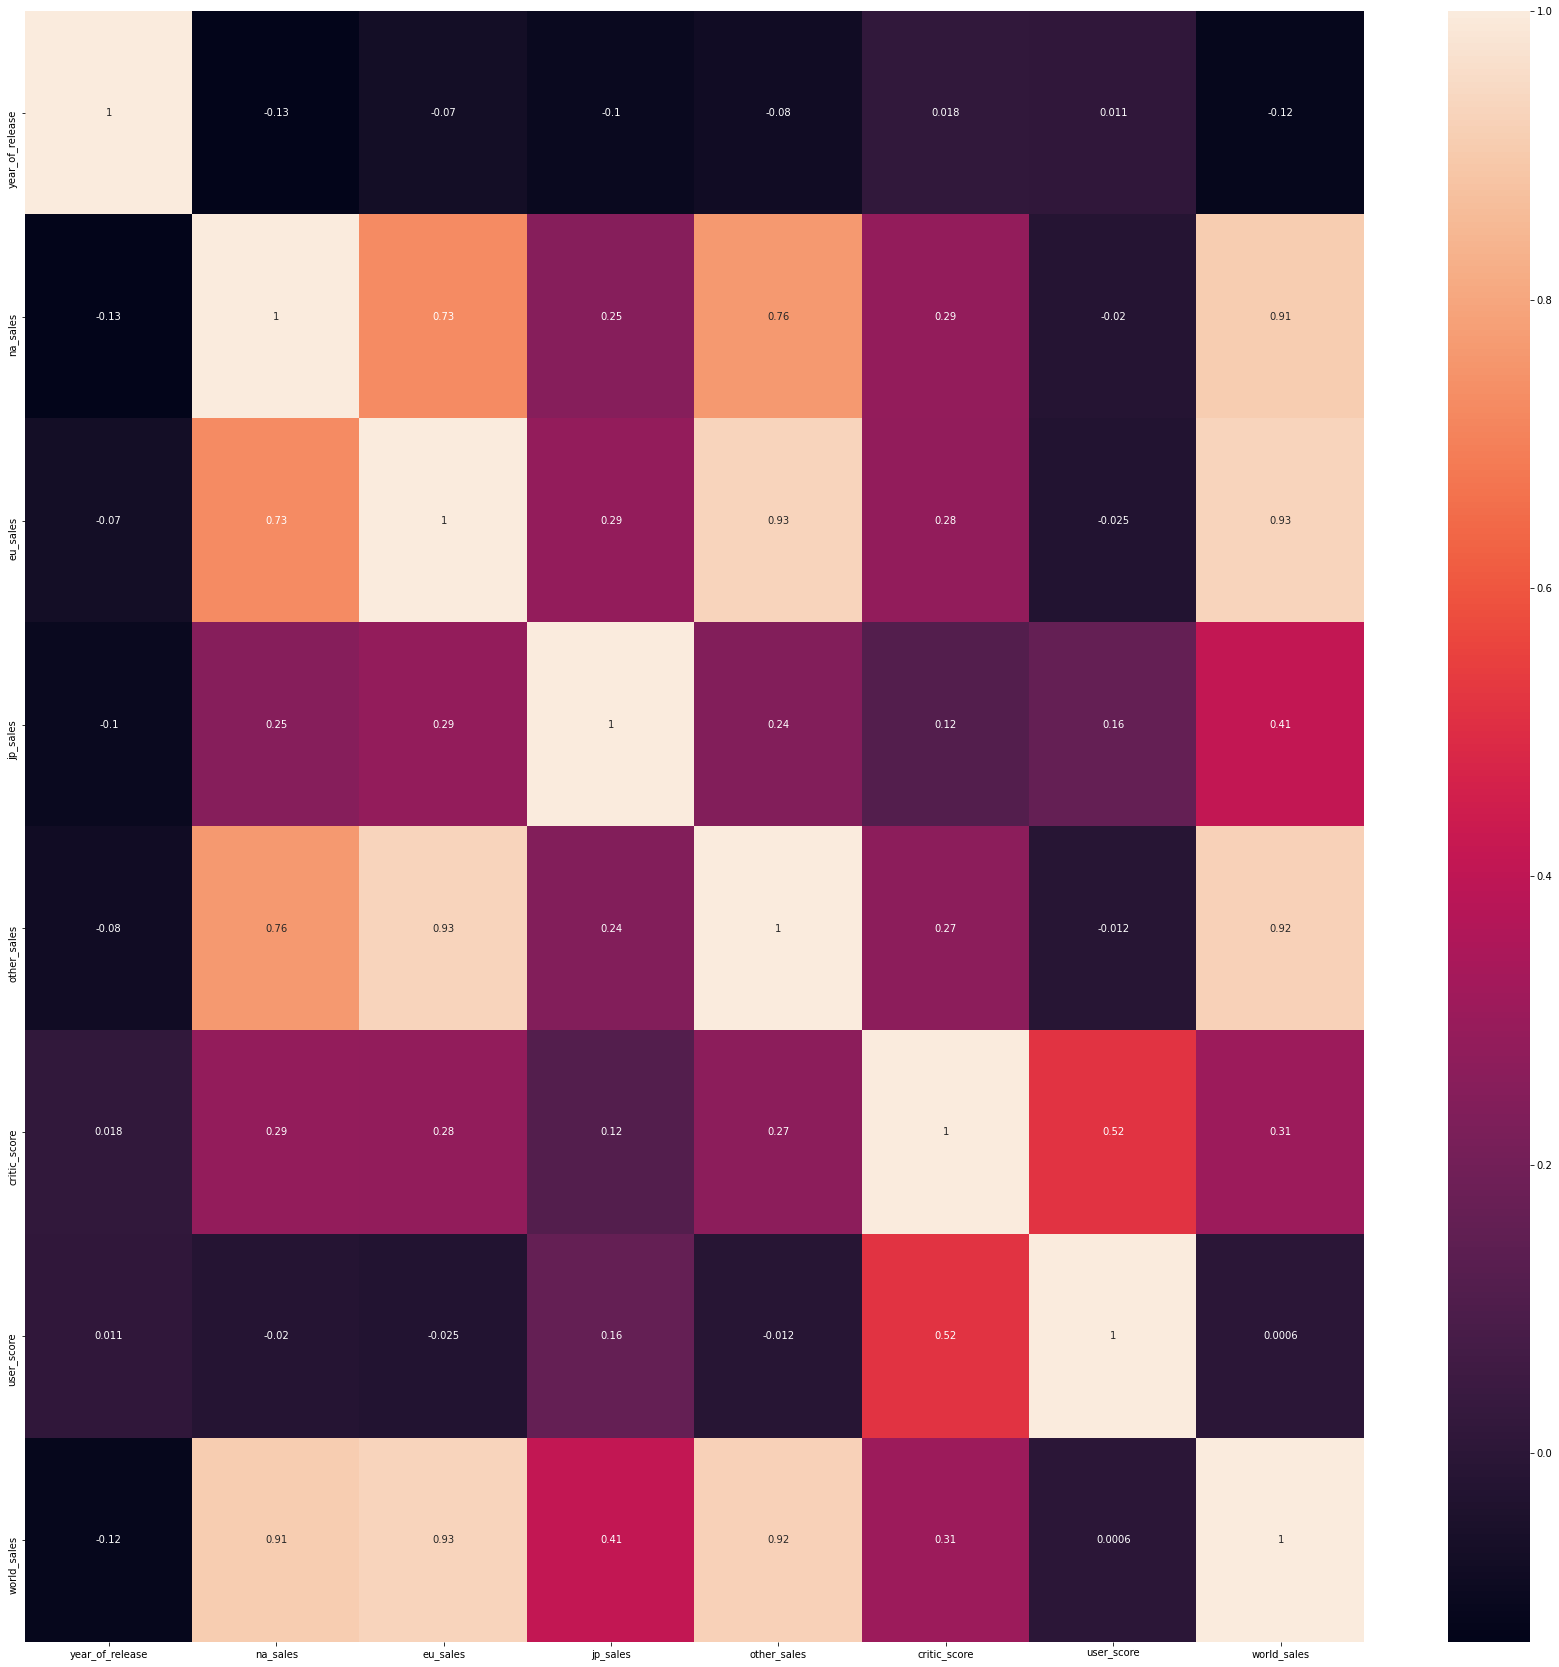

In [46]:
data_corr = data_actual[data_actual['user_score'] != -1]
data_corr = data_corr[data_corr['critic_score'] != -1]

corr = data_corr.corr()
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(corr, annot=True, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        ax=ax)

Тут тоже корреляция между отзывами критиков и продажами повыше, чем обычных пользователей. Еще заметила высокую корреляцию между отзывами критиков и пользователей. Отзывы критиков обычно раньше выходят, получается они влияют на мнение обычных пользователей.


 Корреляция между оценкой пользователей и продажей по миру: -0.09400318326920852 
 Корреляция между оценкой критиков и продажей по миру: 0.41042203561296375


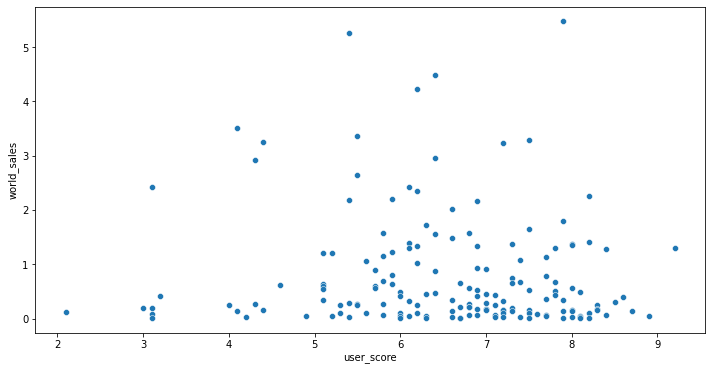

In [47]:
xone_corr = data_corr[data_corr['platform'] == 'XOne']

plt.figure(figsize=(12,6))
sns.scatterplot(x='user_score', y='world_sales', data=xone_corr)

user_corr = xone_corr['user_score'].corr(xone_corr['world_sales'])
critic_corr = xone_corr['critic_score'].corr(xone_corr['world_sales'])
print('\n','Корреляция между оценкой пользователей и продажей по миру:', user_corr,'\n','Корреляция между оценкой критиков и продажей по миру:', critic_corr)

XOne намного сильнее зависят от оценок критиков, намного выше, чем у PS4. А зависимость между оценкой пользователей вообще отрицательная. Получается оценки пользователей совсем не влияют на продажи на данной платформе?


 Корреляция между оценкой пользователей и продажей по миру: 0.20181255007655283 
 Корреляция между оценкой критиков и продажей по миру: 0.31055301915326294


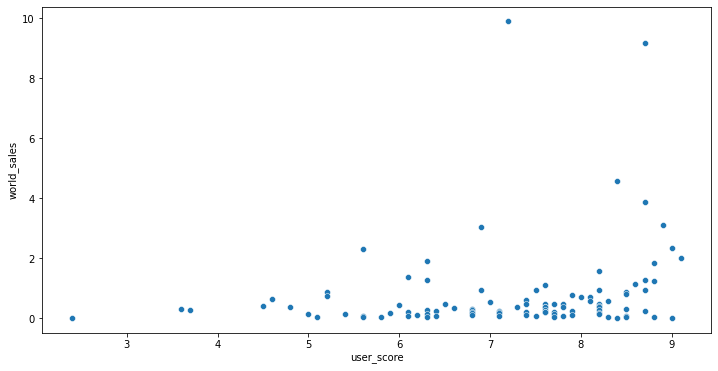

In [48]:
DS3_corr = data_corr[data_corr['platform'] == '3DS']

plt.figure(figsize=(12,6))
sns.scatterplot(x='user_score', y='world_sales', data=DS3_corr)

user_corr = DS3_corr['user_score'].corr(DS3_corr['world_sales'])
critic_corr = DS3_corr['critic_score'].corr(DS3_corr['world_sales'])
print('\n','Корреляция между оценкой пользователей и продажей по миру:', user_corr,'\n','Корреляция между оценкой критиков и продажей по миру:', critic_corr)

##### 8.Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

<AxesSubplot:xlabel='genre'>

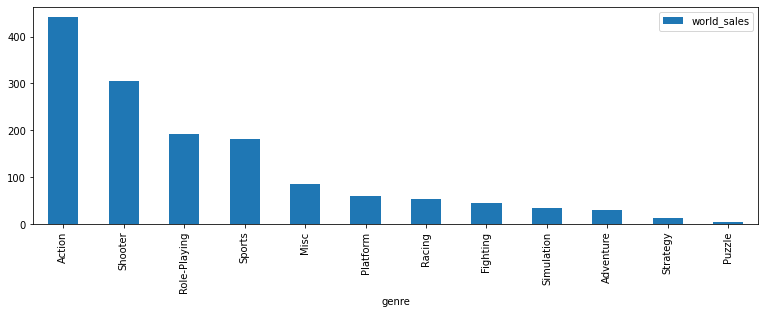

In [49]:
data_actual.pivot_table(index='genre', values='world_sales', aggfunc='sum').sort_values(by='world_sales', ascending=False).plot(kind='bar', figsize=(13,4))

<AxesSubplot:xlabel='genre'>

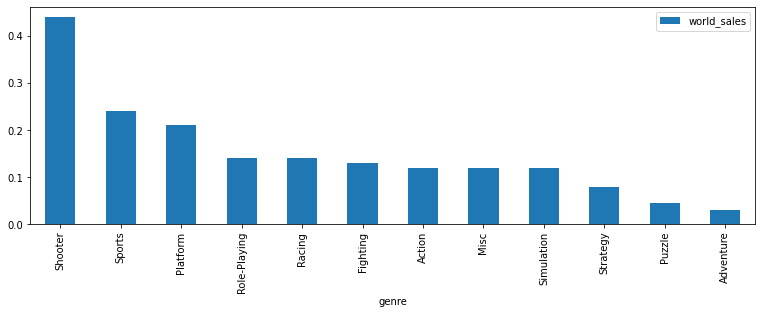

In [50]:
data_actual.pivot_table(index='genre', values='world_sales', aggfunc='median').sort_values(by='world_sales', ascending=False).plot(kind='bar', figsize=(13,4))

<AxesSubplot:xlabel='year_of_release'>

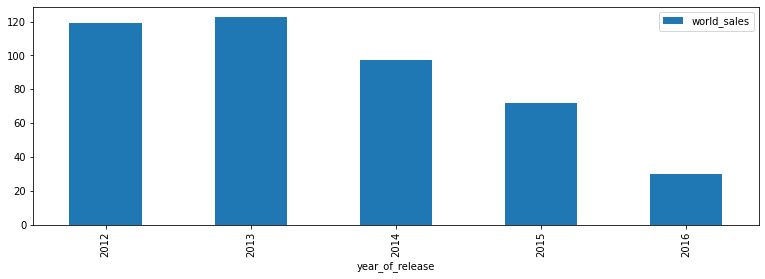

In [51]:
data_actual[data_actual['genre'] == 'Action'].pivot_table(index='year_of_release', values='world_sales', aggfunc='sum').plot(kind='bar', figsize=(13,4))

<AxesSubplot:xlabel='year_of_release'>

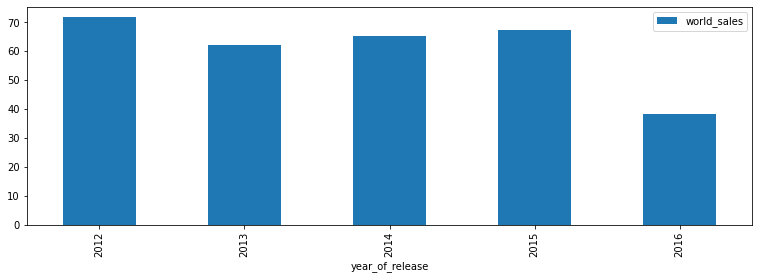

In [52]:
data_actual[data_actual['genre'] == 'Shooter'].pivot_table(index='year_of_release', values='world_sales', aggfunc='sum').plot(kind='bar', figsize=(13,4))

<AxesSubplot:xlabel='year_of_release'>

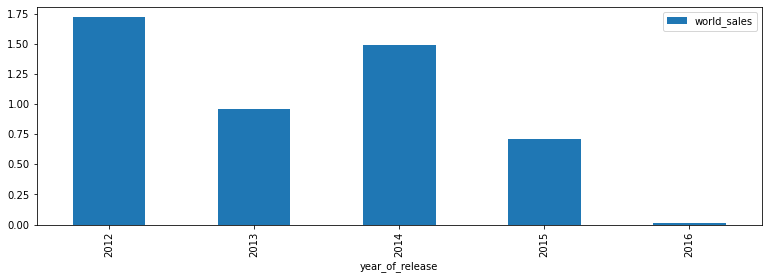

In [53]:
data_actual[data_actual['genre'] == 'Puzzle'].pivot_table(index='year_of_release', values='world_sales', aggfunc='sum').plot(kind='bar', figsize=(13,4))

Выделяются с самыми высокими продажами Action. Puzzle - самые низкие

## Составьте портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):
<br>1.Самые популярные платформы (топ-5). Опишите различия в долях продаж.
<br>2.Самые популярные жанры (топ-5). Поясните разницу.
<br>3.Влияет ли рейтинг ESRB на продажи в отдельном регионе?

North America

In [54]:
data_actual.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head(5)

,na_sales
platform,
X360,140.05
PS4,108.74
PS3,103.38
XOne,93.12
3DS,55.31


In [55]:
data_actual.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head(5)

,na_sales
genre,
Action,177.84
Shooter,144.77
Sports,81.53
Role-Playing,64.00
Misc,38.19


In [56]:
data_actual.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head(5)

,na_sales
rating,
M,231.57
E,114.37
no_rating,103.31
E10+,75.70
T,66.02


In [57]:
no_rate_na = data_actual[data_actual['rating'] == 'no_rating']
no_rate_na.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).reset_index().rename_axis(None, axis=1).head(5)

,platform,na_sales
0,3DS,24.75
1,PS4,23.77
2,XOne,14.63
3,X360,13.74
4,PS3,12.15


В Северной Америке выделяются следующие популярные платформы:
<br>    X360, PS4, PS3, XOne, 3DS

Жанры:
<br>    Action, Shooter, Sport, Role-Playing, Misc

Возрастной рейтинг:
<br>    M (для взрослых), E (для всех), Игры без рейтинга, E10+ (для всех старше 10 лет), T (подросткам, старше 13 лет)

Самые продаваемые игры на платформах без возрастного рейтинга:
<br>   3DS, PS4, XOne, X360, PS3

European Union


In [58]:
data_actual.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head(5)

,eu_sales
platform,
PS4,141.09
PS3,106.86
X360,74.52
XOne,51.59
3DS,42.64


In [59]:
data_actual.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head(5)

,eu_sales
rating,
M,193.96
E,113.03
no_rating,91.50
E10+,55.37
T,52.96


In [60]:
data_actual.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head(5)

,eu_sales
genre,
Action,159.34
Shooter,113.47
Sports,69.09
Role-Playing,48.53
Racing,27.29


In [61]:
no_rate_eu = data_actual[data_actual['rating'] == 'no_rating']
no_rate_eu.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).reset_index().rename_axis(None, axis=1).head(5)

,platform,eu_sales
0,PS4,27.99
1,3DS,20.21
2,PS3,12.44
3,XOne,8.30
4,X360,7.48


В Европе выделяются следующие популярные платформы:
<br>   PS3, PS4, X360, Xone, 3DS

Жанры:
<br>    Action, Shooter, Sport, Role-playing, Racing

Возрастной рейтинг:
<br>    M (для взрослых), E (для всех), Игры без рейтинга, Т(подросткам), Е10+ (для всех, от 10 лет)

Самые продаваемые игры на платформах без возрастного рейтинга:
<br>   PS4, 3DS, PS3, XOne, X360

Japanese

In [62]:
data_actual.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head(5)

,jp_sales
genre,
Role-Playing,65.44
Action,52.80
Misc,12.86
Simulation,10.41
Fighting,9.44


In [63]:
data_actual.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head(5)

,jp_sales
rating,
no_rating,108.84
E,28.33
T,26.02
M,21.20
E10+,8.19


In [64]:
data_actual.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head(5)

,jp_sales
platform,
3DS,87.79
PS3,35.29
PSV,21.04
PS4,15.96
WiiU,13.01


In [65]:
no_rate_jp = data_actual[data_actual['rating'] == 'no_rating']
no_rate_jp.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).reset_index().rename_axis(None, axis=1).head(5)

,platform,jp_sales
0,3DS,60.00
1,PSV,12.86
2,PS3,11.23
3,PSP,9.87
4,PS4,6.25


Если в Европе и Северной Америке было более менее похожее поведение, то в Японии портрет совершенно отличается.

В Японии выделяются следующие популярные платформы:
<br>   3DS, PS3, PSV, PS4, WiiU

Жанры:
<br>    Role-playing, Action, Misc, Simulation, Fighting

Возрастной рейтинг:
<br>    Игры без рейтинга, E (для всех), Игры без рейтинга, Т(подросткам),  M (для взрослых), Е10+ (для всех, от 10 лет)

Самые продаваемые игры на платформах без возрастного рейтинга:
<br>   3DS, PSV, PS3, PSP, PS4

Как будто бы рейтинг ESRB влияет на продажи только в Европе и Северной Америке. В Японии больше отдают внимания ретро играм, у которых даже возрастного рейтинга нету.

## Проверьте гипотезы

1.Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
<br>2.Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
<br>3.Задайте самостоятельно пороговое значение alpha.
<br>4.Поясните:
<br>4.1.Как вы сформулировали нулевую и альтернативную гипотезы;
<br>4.2.Какой критерий применили для проверки гипотез и почему.

<b>Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

<br>H0: средний пользовательский рейтинг жанров Xbox One и PC одинаковый
<br>H1: средний пользовательский рейтинг жанров Xbox One и PC различается

In [66]:
data_corr['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'WiiU', 'Wii', 'XOne', 'PC', 'PSV',
       'DS', 'PSP'], dtype=object)

In [67]:
pc = data_corr[data_corr['platform']=='PC']['user_score']
xone = data_corr[data_corr['platform']=='XOne']['user_score']

In [68]:
pc.mean()

6.4543147208121825

In [69]:
xone.mean()

6.538181818181818

In [70]:
alpha = .05
results = st.ttest_ind(xone, pc, equal_var=False)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5926561176517491
Не получилось отвергнуть нулевую гипотезу


<b>Вывод: получается, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

<b>Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

<br>H0: средний пользовательский рейтинг жанров Action и Sports одинаковый
<br>H1: средний пользовательский рейтинг жанров Action и Sports различается

In [71]:
data_corr['genre'].unique()

array(['Action', 'Shooter', 'Platform', 'Simulation', 'Sports',
       'Role-Playing', 'Racing', 'Misc', 'Fighting', 'Strategy',
       'Adventure', 'Puzzle'], dtype=object)

In [72]:
action = data_corr[data_corr['genre']=='Action']['user_score']
sports = data_corr[data_corr['genre']=='Sports']['user_score']

In [73]:
action.mean()

6.899305555555555

In [74]:
sports.mean()

5.819858156028368

In [75]:
alpha = .05
results = st.ttest_ind(action, sports, equal_var=False)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 5.858072645452818e-14
Отвергаем нулевую гипотезу


<b>Вывод: Получается, что средний пользовательский рейтинг жанров Action и Sports различается.

### Общий вывод

##### Обработка данных.
Изучила вводные данные, сделала следующие выводы.:

critic_score, users_score - Так как не все оценки успевают во время выходить, то присутствуют пропуски в датасете. Заполнить медианной и средним будет не получится, так как это может повлиять на общую картину оценок в данных, поэтому сделала замену на пропущенных значений на -1.
rating - Возрастной рейтинг не у всех заполнен, особенно у стареньких игр. Возможно, что тогда и категории не присваивали.Сделала замену на пропущенных значений на 'no_rating'
year_of_release - Тип заменен на float.
year_of_release, genre и name - Не существенно много пропусков, оставила как есть.

##### Исследовательский анализ данных

C 1995 года игры набирают популярность. Пик приходится на 2008 - 2009 год. Мне кажется, что можно брать данные не за весь период, а начиная с 1995 года. С выходом выходом новой платформы обычно первые 5 лет идет рост продаж, но потом идут 5 лет спада, на фоне выхода уже более новой платформы.

Для выбора самого актуального периода для прогноза на 2017 год, был выбран после 2011 года. Выбрав данный период мы обойдем часть выбросов в продажах:к этому времени уже упали продажи совсем стареньких платформ, появились новые, у которых еще не прошли 5 лет спада продаж. Самой прибыльной платформой в данный период можно назвать PS4,XOne, DS3 по сравнению с другими платформами у них еще не так сильно упали продажи.

Есть зависимость между оценкой критиков и продажами по миру, а так же отметила высокую корреляцию между отзывами критиков и пользователей. Отзывы критиков обычно раньше выходят, получается они влияют на мнение обычных пользователей.
Отметила, что среди популярных платформ у Xone самая высокая зависимость между оценкой критиков и продажами по миру.

Выделяются с самыми высокими продажами Action за счет большего количества игр и большого количества бестселлеров. По медианным значениям лидирует Shooter, который имеет больше продаж в расчете на единицу игры.

##### Портрет по регионам

В <b>Северной Америке</b> выделяются следующие популярные платформы:
X360, PS4, PS3, XOne, 3DS

Жанры:
Action, Shooter, Sport, Role-Playing, Misc

Возрастной рейтинг:
M (для взрослых), E (для всех), Игры без рейтинга, E10+ (для всех старше 10 лет), T (подросткам, старше 13 лет)

Самые продаваемые игры на платформах без возрастного рейтинга:
3DS, PS4, XOne, X360, PS3


<br>В <b>Европе</b> выделяются следующие популярные платформы:
PS3, PS4, X360, Xone, 3DS

Жанры:
Action, Shooter, Sport, Role-playing, Racing

Возрастной рейтинг:
M (для взрослых), E (для всех), Игры без рейтинга, Т(подросткам), Е10+ (для всех, от 10 лет)

Самые продаваемые игры на платформах без возрастного рейтинга:
PS4, 3DS, PS3, XOne, X360



<br>В <b>Японии</b> выделяются следующие популярные платформы:
3DS, PS3, PSV, PS4, WiiU

Жанры:
Role-playing, Action, Misc, Simulation, Fighting

Возрастной рейтинг:
Игры без рейтинга, E (для всех), Игры без рейтинга, Т(подросткам), M (для взрослых), Е10+ (для всех, от 10 лет)

Самые продаваемые игры на платформах без возрастного рейтинга:
3DS, PSV, PS3, PSP, PS4



<br><b>Как будто бы рейтинг ESRB влияет на продажи только в Европе и Северной Америке. В Японии больше отдают предпочтение портативным платформам. В тоже время, в Европе и Америке наоборт больше предпочитают PS4 и XOne. Предположила, что в Японии покупают игры без рейтинга, потому что это совсем старенькие игры во время выхода которых возрастной рейтинговой системы и не было раньше.</b>
##### Проверьте гипотезы
Из проверок гипотез мы получили следующие выводы:

<br>Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
<br>Средний пользовательский рейтинг жанров Action и Sports различается.